<a href="https://colab.research.google.com/github/Ucchwas/AddressOverfitting-FlowerClassification/blob/main/AddressOverfittngFlowerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import cv2
import PIL
import os
import matplotlib.pyplot as plt


from tensorflow import keras
from tensorflow.keras import models,layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.',untar=True)

228827136/228813984 [==============================] - 2s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/14683774134_6367640585.jpg'),
 PosixPath('datasets/flower_photos/roses/3451177763_729a4d54af_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5799616059_0ffda02e54.jpg'),
 PosixPath('datasets/flower_photos/roses/3072908271_08764c732a_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3315973481_850d2253e9_n.jpg')]

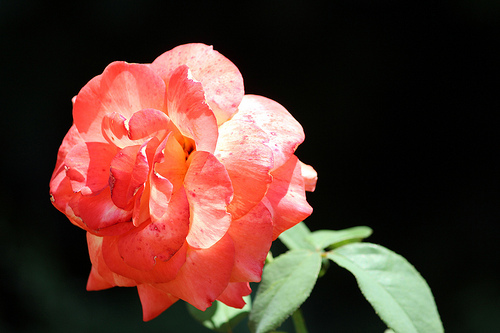

In [7]:
PIL.Image.open(str(roses[0]))

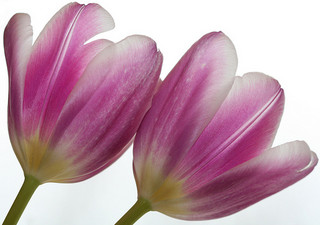

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(tulips[0])

In [9]:
flower_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}
flower_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/14683774134_6367640585.jpg'),
 PosixPath('datasets/flower_photos/roses/3451177763_729a4d54af_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5799616059_0ffda02e54.jpg'),
 PosixPath('datasets/flower_photos/roses/3072908271_08764c732a_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3315973481_850d2253e9_n.jpg')]

In [10]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}
flowers_labels_dict['roses']

0

In [32]:
img = cv2.imread(str(flower_images_dict['roses'][0]))
img.shape

(333, 500, 3)

In [12]:
cv2.resize(img,(100,100)).shape

(100, 100, 3)

In [13]:
x,y = [] , []

for flowers_name,flowers in flower_images_dict.items():
  for flower in flowers:
    img = cv2.imread(str(flower))
    resized_img = cv2.resize(img,(100,100))
    x.append(resized_img)
    y.append(flowers_labels_dict[flowers_name])


In [14]:
import numpy as np
x = np.array(x)
y = np.array(y)
y

array([0, 0, 0, ..., 4, 4, 4])

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)


In [16]:
len(x_train)

2752

In [17]:
x_train = x_train / 255
x_test = x_test / 255

In [18]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 26s 290ms/step - loss: 1.3371 - accuracy: 0.4186
Epoch 2/30
86/86 [==============================] - 25s 290ms/step - loss: 0.9973 - accuracy: 0.6094
Epoch 3/30
86/86 [==============================] - 25s 291ms/step - loss: 0.8520 - accuracy: 0.6657
Epoch 4/30
86/86 [==============================] - 25s 291ms/step - loss: 0.7334 - accuracy: 0.7158
Epoch 5/30
86/86 [==============================] - 25s 290ms/step - loss: 0.6067 - accuracy: 0.7707
Epoch 6/30
86/86 [==============================] - 25s 292ms/step - loss: 0.4762 - accuracy: 0.8259
Epoch 7/30
86/86 [==============================] - 25s 294ms/step - loss: 0.3434 - accuracy: 0.8768
Epoch 8/30
86/86 [==============================] - 25s 294ms/step - loss: 0.2421 - accuracy: 0.9204
Epoch 9/30
86/86 [==============================] - 25s 294ms/step - loss: 0.1750 - accuracy: 0.9408
Epoch 10/30
86/86 [==============================] - 25s 294ms/step - loss: 0.0932 - accura

In [19]:
model.evaluate(x_test,y_test)

29/29 [==============================] - 3s 90ms/step - loss: 2.5715 - accuracy: 0.6645


[2.571477174758911, 0.6644880175590515]

In [20]:
y_pred = model.predict(x_test)
y_pred

array([[ 2.6310418e+00,  8.4040956e+00,  3.2095397e+00, -3.5325723e+00,
        -3.9130037e+00],
       [ 1.3957743e+01, -1.2055337e+01,  3.3847837e+00, -1.4114671e+01,
         7.9185486e+00],
       [ 3.0864254e-03, -3.7777264e+00,  8.2454576e+00, -1.0522334e+01,
        -6.7608279e-01],
       ...,
       [-9.1887817e+00, -1.8757959e+01,  7.2209439e+00,  1.3269233e+01,
         1.2777253e+01],
       [ 1.0746768e+01, -2.4865825e+00, -4.9540124e+00, -1.9190174e+01,
         7.2616072e+00],
       [-4.3175330e+00,  1.0337215e+01, -9.7106338e-01, -7.2505341e+00,
         2.0428524e+00]], dtype=float32)

In [21]:
score = tf.nn.softmax(y_pred[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([3.0835159e-03, 9.9140644e-01, 5.4990118e-03, 6.4896685e-06,
       4.4361209e-06], dtype=float32)>

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[1, 0, 2, 0, 2, 3, 3, 4, 3, 0]

In [23]:
y_test[:10]

array([1, 0, 2, 4, 2, 3, 0, 4, 3, 4])

In [35]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(100, 
                                                              100,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

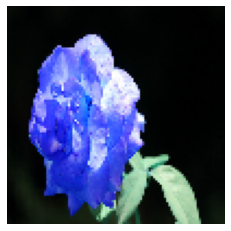

In [29]:
plt.axis('off')
plt.imshow(x[0])

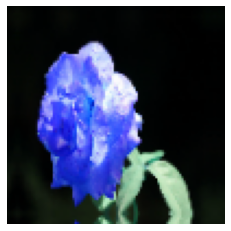

In [28]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [36]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 30s 342ms/step - loss: 1.3701 - accuracy: 0.4030
Epoch 2/30
86/86 [==============================] - 29s 342ms/step - loss: 1.0942 - accuracy: 0.5469
Epoch 3/30
86/86 [==============================] - 29s 342ms/step - loss: 0.9919 - accuracy: 0.6036
Epoch 4/30
86/86 [==============================] - 29s 342ms/step - loss: 0.9216 - accuracy: 0.6344
Epoch 5/30
86/86 [==============================] - 29s 342ms/step - loss: 0.8679 - accuracy: 0.6646
Epoch 6/30
86/86 [==============================] - 29s 342ms/step - loss: 0.8152 - accuracy: 0.6824
Epoch 7/30
86/86 [==============================] - 29s 342ms/step - loss: 0.7788 - accuracy: 0.7046
Epoch 8/30
86/86 [==============================] - 29s 341ms/step - loss: 0.7484 - accuracy: 0.7148
Epoch 9/30
86/86 [==============================] - 29s 341ms/step - loss: 0.7239 - accuracy: 0.7238
Epoch 10/30
86/86 [==============================] - 29s 341ms/step - loss: 0.6693 - accura

In [37]:
model.evaluate(x_test,y_test)

29/29 [==============================] - 3s 91ms/step - loss: 0.9988 - accuracy: 0.7037


[0.9988494515419006, 0.7037037014961243]